<a href="https://colab.research.google.com/github/emilianodesu/RLA2/blob/main/cartpole/cart-pole-dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q-Network on classic control

This notebook will explore the implementation of a DQN from Stable Baselines3 on a classic-control environment.

### What you will learn?
* Using Deep Q-Network from Stable Baseline3
* Training on cart pole environment

## Setup
Install necessary dependencies.

In [2]:
!pip install gymnasium
!pip install "stable-baselines3[extra]"
!pip install moviepy
!sudo apt-get update
!apt-get install -y xvfb ffmpeg freeglut3-dev

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

Import libraries

In [3]:
# Import necessary libraries and modules
import os
import gymnasium as gym
import stable_baselines3
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import base64
from IPython import display as ipythondisplay

print(f"{gym.__version__=}")
print(f"{stable_baselines3.__version__=}")

gym.__version__='1.2.1'
stable_baselines3.__version__='2.7.0'


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Configure Environment

In [4]:
# Set up a fake display for rendering videos in the cloud environment
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

## Callbacks and directory setup

In [5]:
# Callback for saving the model at regular intervals
class SaveOnIntervalCallback(BaseCallback):
    def __init__(self, save_interval: int, save_path: str, verbose=1):
        super().__init__(verbose)
        self.save_interval = save_interval
        self.save_path = save_path

    def _on_step(self) -> bool:
        if self.num_timesteps % self.save_interval == 0:
            save_file = os.path.join(self.save_path, f'model_{self.num_timesteps}')
            self.model.save(save_file)
            if self.verbose > 0:
                print(f'Saving model to {save_file}.zip')
        return True

In [6]:
# Creating directories for storing logs and models
log_dir = "dqn/logs/"
models_dir = "dqn/models/"
videos_dir = "dqn/videos/"

os.makedirs(log_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

## Cart pole environment

In [7]:
env_id = "CartPole-v1"
env = gym.make(env_id)
# Wrap it in a Monitor and DummyVecEnv. The Monitor needs the log_dir.
env = Monitor(env, log_dir)
env = DummyVecEnv([lambda: env])

## DQN Model

In [27]:
# We are defining a network with two hidden layers of 64 neurons each.
policy_kwargs = dict(net_arch=[64, 64])

# ### CHANGE 3: Use MlpPolicy and CartPole-specific hyperparameters ###
model = DQN(
    "MlpPolicy",
    env=env,
    verbose=1,
    learning_rate=2.3e-3,
    buffer_size=10000,
    learning_starts=1000,
    batch_size=64,
    train_freq=4,
    gradient_steps=1,
    target_update_interval=250,
    exploration_fraction=0.2,
    exploration_final_eps=0.05,
    policy_kwargs=policy_kwargs # Use our custom network
)

Using cpu device


## Train the model

In [28]:
# Set up the callback for saving models
save_interval = 10000
save_callback = SaveOnIntervalCallback(save_interval=save_interval, save_path=models_dir)

# ### CHANGE 4: Reduce total timesteps ###
total_timesteps = 50000

# Train the DQN agent
model.learn(total_timesteps=total_timesteps, callback=save_callback)

# Save the final trained model
final_model_path = os.path.join(models_dir, f'model_{total_timesteps}')
model.save(final_model_path)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.8     |
|    ep_rew_mean      | 25.8     |
|    exploration_rate | 0.99     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2786     |
|    time_elapsed     | 0        |
|    total_timesteps  | 103      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3805     |
|    time_elapsed     | 0        |
|    total_timesteps  | 163      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes       

## Performance evaluation

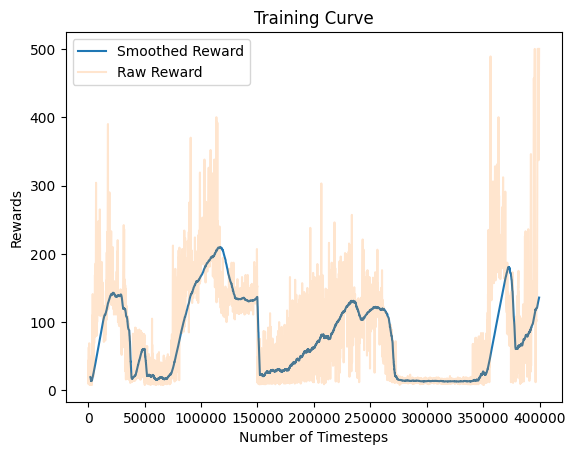

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [29]:
def plot_results(log_folder: str):
    """
    Plots the training curve from the Monitor log file.
    :param log_folder: the save directory of the Monitor logs
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')

    # Smooth the curve
    y_smooth = np.convolve(y, np.ones(100)/100, mode='valid')
    x_smooth = x[len(x) - len(y_smooth):]

    fig = plt.figure("Training Curve")
    plt.plot(x_smooth, y_smooth, label="Smoothed Reward")
    plt.plot(x, y, alpha=0.2, label="Raw Reward")
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title("Training Curve")
    plt.legend()
    plt.show()

# Call the function after training to see the learning curve
plot_results(log_dir)

## Video Recording and Display Functions

In [20]:
# Functions to record and show videos of the agent playing

def show_videos(video_path="", prefix=""):
    html = []
    for mp4 in Path(video_path).glob(f"{prefix}*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            f'''<video alt="{mp4.name}" autoplay loop controls style="height: 400px;">
                  <source src="data:video/mp4;base64,{video_b64.decode('ascii')}" type="video/mp4" />
             </video>'''
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

# ### MODIFICATION ###: Updated video folder and env_id
def record_video(env_id, model, video_length=500, prefix="", video_folder="dqn/videos"):
    os.makedirs(video_folder, exist_ok=True)
    eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])
    eval_env = VecVideoRecorder(
        eval_env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )
    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs, deterministic=True) # Use deterministic for evaluation
        obs, _, _, _ = eval_env.step(action)
    eval_env.close()

## Record and Display Videos at Different Training Stages

In [21]:
# Functions for analyzing the trained models

# Function to get the identifiers of saved models
def get_model_identifiers(models_dir):
    files = os.listdir(models_dir)  # Listing files in the models directory
    model_files = [f for f in files if f.startswith('model_')]  # Filtering out model files
    identifiers = [f.split('_')[1] for f in model_files]  # Extracting identifiers from file names
    return identifiers

# Function to find key identifiers (earliest, middle, final)
def find_key_identifiers(identifiers):
    identifiers.sort()  # Sorting identifiers
    earliest = identifiers[0]  # Earliest identifier
    final = identifiers[-1]  # Final identifier
    middle = identifiers[len(identifiers) // 2]  # Middle identifier
    return earliest, middle, final

# Function to view videos of the models at different training stages
def view(models_dir):
    identifiers = get_model_identifiers(models_dir)  # Getting model identifiers
    print(identifiers)
    earliest, middle, final = find_key_identifiers(identifiers)  # Finding key identifiers

    # Recording and displaying videos at the beginning, middle, and end of training
    for stage, identifier in zip(["beginning", "middle", "end"], [earliest, middle, final]):
        model_path = os.path.join(models_dir, f'model_{identifier}')  # Forming the model path
        model = DQN.load(model_path)  # Loading the model
        record_video("CartPole-v1", model, video_length=5000, prefix=f'dqn-cartpole-{stage}')  # Recording video
        show_videos("dqn/videos/", prefix=f'dqn-cartpole-{stage}')  # Showing videos

In [30]:
# Changes the model directory below
models_dir="dqn/models"
view(models_dir)  # Calling the view function

['150000.zip', '25000.zip', '30000.zip', '10000.zip', '50000.zip', '40000.zip', '20000.zip', '200000.zip', '75000.zip', '125000.zip', '175000.zip', '100000.zip']
Saving video to /content/dqn/videos/dqn-cartpole-beginning-step-0-to-step-5000.mp4
Moviepy - Building video /content/dqn/videos/dqn-cartpole-beginning-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/dqn/videos/dqn-cartpole-beginning-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/dqn/videos/dqn-cartpole-beginning-step-0-to-step-5000.mp4


Saving video to /content/dqn/videos/dqn-cartpole-middle-step-0-to-step-5000.mp4
Moviepy - Building video /content/dqn/videos/dqn-cartpole-middle-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/dqn/videos/dqn-cartpole-middle-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/dqn/videos/dqn-cartpole-middle-step-0-to-step-5000.mp4


Saving video to /content/dqn/videos/dqn-cartpole-end-step-0-to-step-5000.mp4
Moviepy - Building video /content/dqn/videos/dqn-cartpole-end-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/dqn/videos/dqn-cartpole-end-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/dqn/videos/dqn-cartpole-end-step-0-to-step-5000.mp4
